In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [42]:
def plot_dcorr(**kwarg):

    bin = kwarg['bin']
    save = kwarg['save']

    BIN_NUM = [5,10,20,30]

    fig, ax = plt.subplots(4,2, figsize=(6*2,4*4))
    for sess in range(1):
        for ii, num in enumerate(BIN_NUM):
            
            if bin:
                with open('df_stat_ind_crossover_k={}.pickle'.format(num), 'rb') as f:
                    df_stat = pickle.load(f)
                cols = df_stat.columns[4:]
                col_lab = [4,5,6]
                filename = '20210122_dcorr_analysis_bin.png'

            else:
                with open('df_stat_ind_all_k={}.pickle'.format(num), 'rb') as f:
                    df_stat = pickle.load(f)
                cols = df_stat.columns[2:]
                col_lab = [2,3,4]
                filename = '20210122_dcorr_analysis_all.png'
            
            col = [col[:-7] for col in cols]

            # df_stat_0 = df_stat.loc[df_stat['Session'] == sess]
            df_stat_0 = df_stat

            lst_0_stat = []
            lst_0_pval = []

            for i in col_lab:
                lst_0_stat.append(np.array(np.array(df_stat_0.iloc[:,i]).tolist())[:,0])
                lst_0_pval.append(np.array(np.array(df_stat_0.iloc[:,i]).tolist())[:,1])
            
            ax[ii,0].boxplot(lst_0_stat, labels=col)
            # ax[ii,0].bar(x=col, height=lst_0_stat, alpha=0.2)
            ax[ii,0].set_title('Dcorr Stat (k={})'.format(num))
            ax[ii,1].boxplot(lst_0_pval, labels=col)
            ax[ii,1].set_yscale('log')
            # ax[ii,1].bar(x=col, height=lst_0_pval, log=True,alpha=0.2)
            ax[ii,1].set_title('Dcorr p-val (k={})'.format(num))    

    if save:
        plt.savefig(filename, bbox_inches='tight')

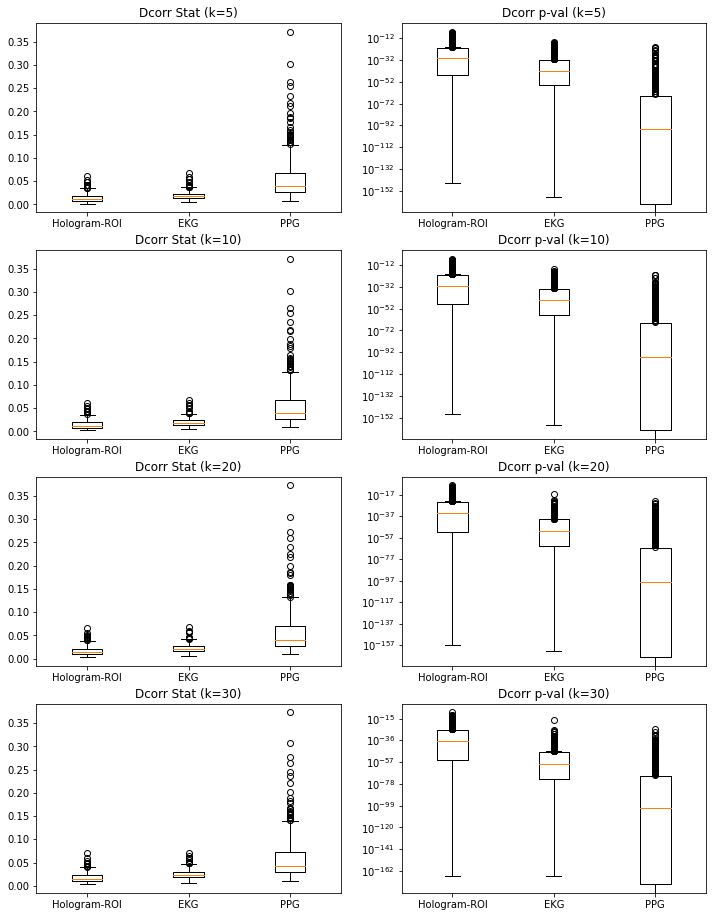

In [43]:
plot_dcorr(bin=True, save=True)

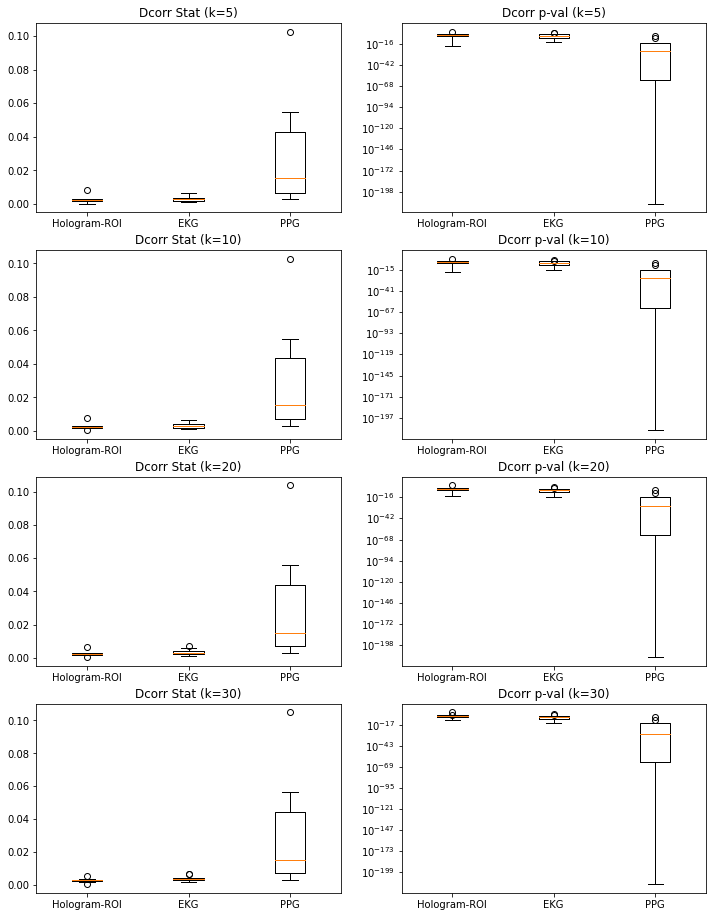

In [44]:
plot_dcorr(bin=False, save=True)

In [ ]:
stop here

## Note below

<BarContainer object of 3 artists>

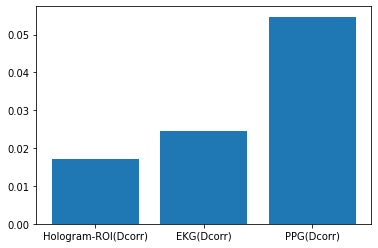

In [9]:
df_stat_0 = df_stat.loc[df_stat['Session'] == 0]
col = df_stat.columns[4:]
lst_0_stat = []
lst_0_pval = []
for i in [4,5,6]:
    lst_0_stat.append(np.array(np.array(df_stat_0.iloc[:,i]).tolist())[:,0].mean())
    lst_0_pval.append(np.array(np.array(df_stat_0.iloc[:,i]).tolist())[:,1].mean())
# np.array(np.array(df_stat_0.iloc[:,5]).tolist())[:,0]
# np.array(np.array(df_stat_0.iloc[:,6]).tolist())[:,0]
plt.bar(x=col, height=lst_0_stat)
# plt.bar(x=['0','1','2'], height=lst_0_pval, log=True)
# plt.bar(lst_0_stat)
# len(lst_0_stat)